In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [2]:
df = pd.read_csv(r'C:\Users\Data\dataset\DATA\hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
plt.style.use(['science','notebook','grid'])

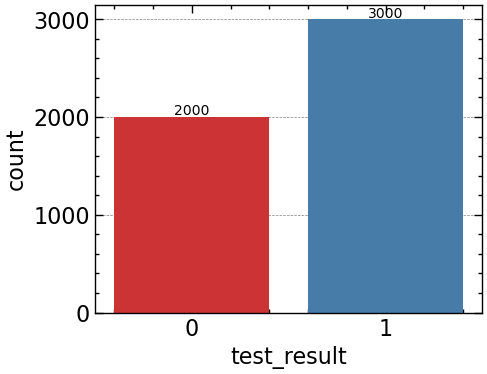

In [7]:
fig = plt.figure(figsize=(5,4), dpi =100)

ax = sns.countplot(x='test_result', data=df, palette='Set1')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height + 20, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.show()

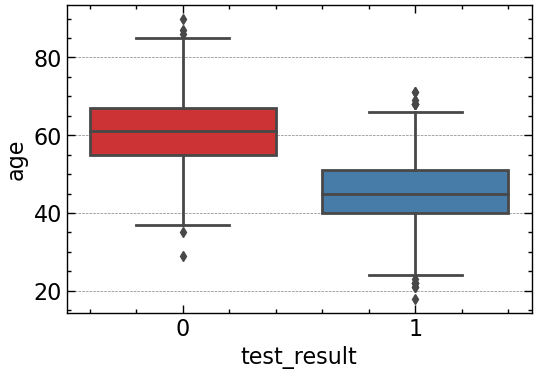

In [8]:
plt.figure(figsize=(6,4), dpi=100)
sns.boxplot(x='test_result', y='age', data=df, palette='Set1');

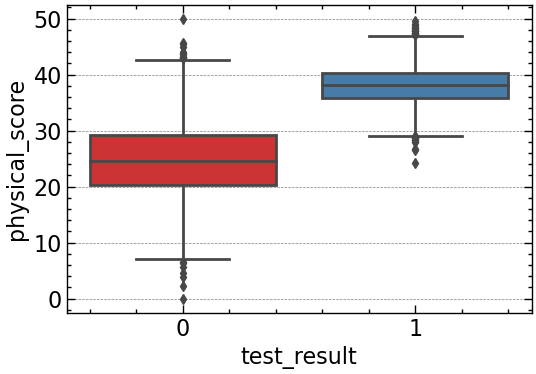

In [9]:
plt.figure(figsize=(6,4), dpi=100)
sns.boxplot(x='test_result', y='physical_score', data=df, palette='Set1');

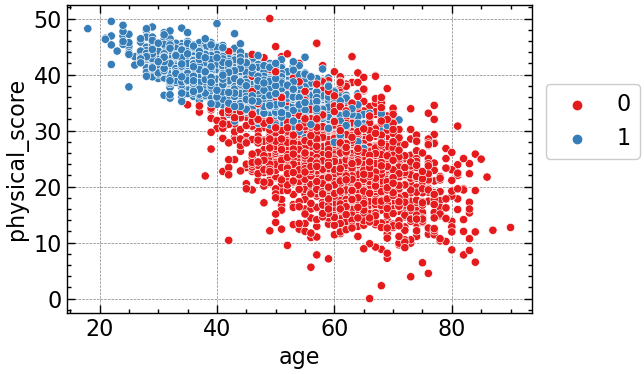

In [10]:
plt.figure(figsize=(6,4), dpi=100)
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', palette='Set1')
plt.legend(loc=(1.03, 0.5));

In [11]:
plt.style.use('default')

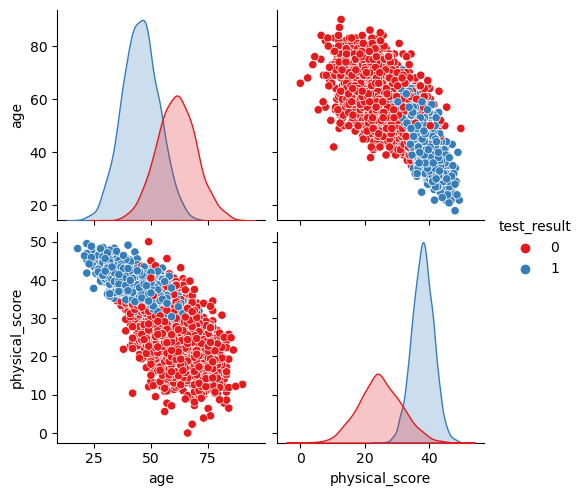

In [12]:
sns.pairplot(df,hue='test_result', palette='Set1');

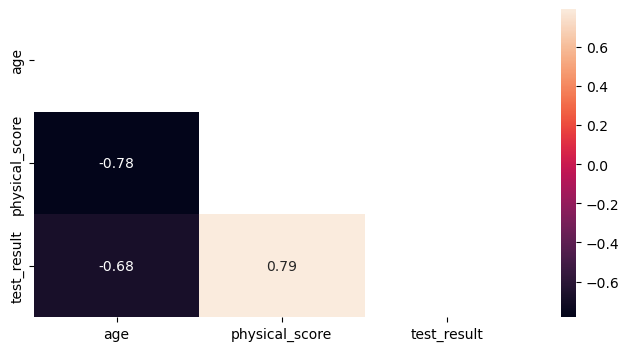

In [13]:
matrix = df.corr()
# mask 
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(matrix)]=True

plt.figure(figsize=(8,4), dpi=100)
sns.heatmap(matrix, mask=mask, annot=True);

In [14]:
plt.style.use(['science','notebook','grid'])

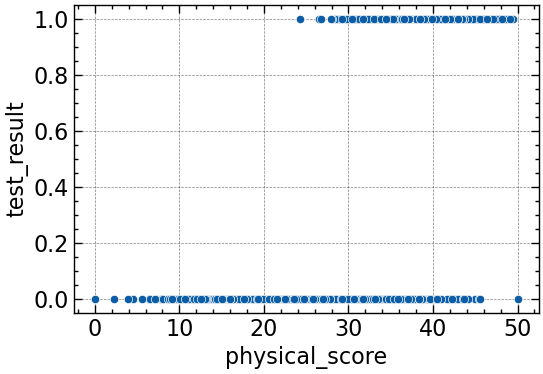

In [15]:
plt.figure(figsize=(6,4), dpi=100)
sns.scatterplot( x='physical_score',y='test_result',data=df);

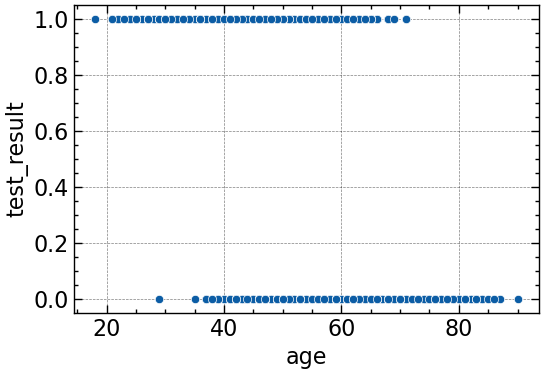

In [16]:
plt.figure(figsize=(6,4), dpi=100)
sns.scatterplot(x='age', y='test_result', data=df);

### Plot 3D

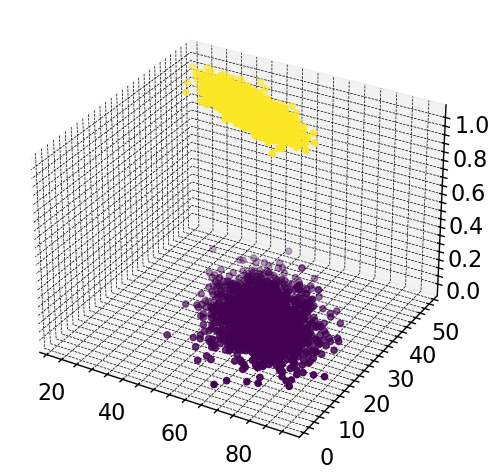

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c = df['test_result']);

## Spliting Data and Scaling Data

In [18]:
X = df.drop('test_result', axis=1 )
y = df['test_result']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [21]:
# scaling data
scaler = StandardScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

---
---
## Create Model Logistic Regressor

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [24]:
logistic_model = LogisticRegression()

In [25]:
logistic_model.fit(scaler_X_train, y_train)

LogisticRegression()

<b> Coefficient Interpretation

In [26]:
logistic_model.coef_

array([[-0.94953524,  3.45991194]])

### Prediction model

In [27]:
logistic_pred = logistic_model.predict(scaler_X_test)

## Metric Evaluation for Classifier

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay

In [29]:
ACC = accuracy_score(y_test, logistic_pred)
ACC

0.93

In [30]:
cm = confusion_matrix(y_test, logistic_pred)
cm

array([[172,  21],
       [ 14, 293]], dtype=int64)

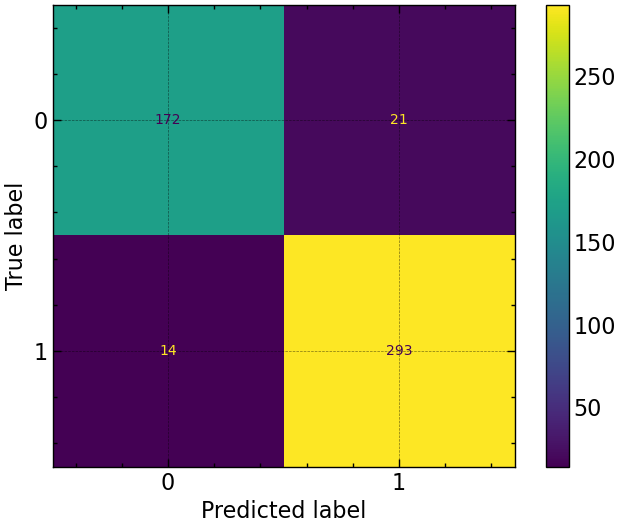

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logistic_model.classes_)
disp.plot()

In [32]:
print(classification_report(y_test,logistic_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [33]:
X_train.iloc[0]

age               32.0
physical_score    43.0
Name: 141, dtype: float64

In [34]:
y_train.iloc[0]

1

In [35]:
# 0% probability of 0 class
# 100% probability of 1 class

logistic_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0., 1.]])

In [36]:
logistic_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1], dtype=int64)

---
----
## Evaluation Curve and AUC

In [37]:
from sklearn.metrics import PrecisionRecallDisplay

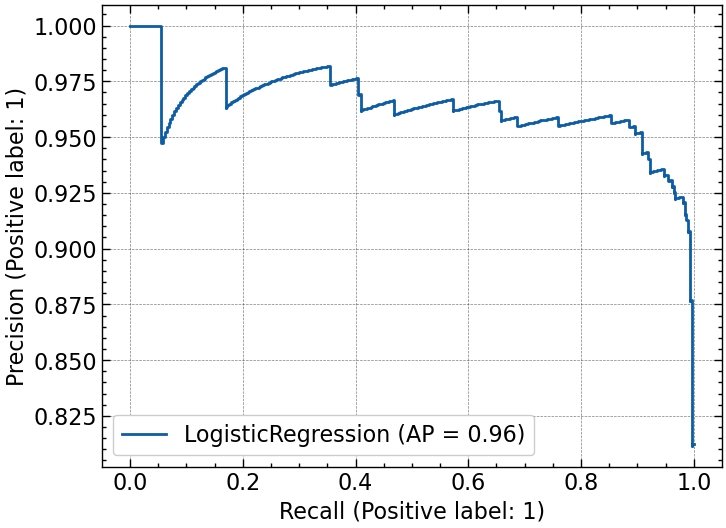

In [38]:
PrecisionRecallDisplay.from_estimator(logistic_model, scaler_X_test, y_test);

In [39]:
from sklearn.metrics import RocCurveDisplay

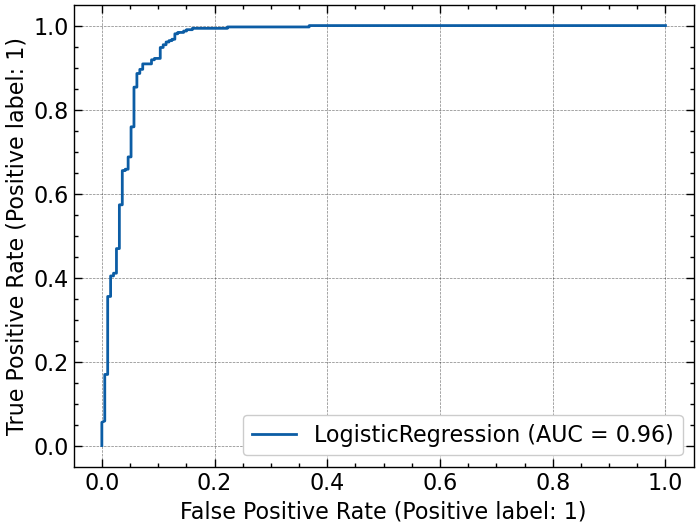

In [40]:
RocCurveDisplay.from_estimator(logistic_model, scaler_X_test, y_test);